# Deep Learning

* A tensor is a N dimensional array of data
* Rank 0 = scalar, Rank 1 = vector, Rank 2 = matrix 

# GPU Support

In [92]:
import tensorflow as tf
print('Tensorflow version is: ', tf.__version__)
print('Number of GPUs available: ',len(tf.config.experimental.list_physical_devices('GPU')) )
print('List of physical devices: ', tf.config.experimental.list_physical_devices())
print('Built with CUDA: ', tf.test.is_built_with_cuda())

# using GPU on code:
# with tf.device('/GPU:0'):
    #insert model building code here

Tensorflow version is:  2.4.1
Number of GPUs available:  0
List of physical devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Built with CUDA:  True


# Computer Vision using Deep Learning

# ANN (Artificial Neural Network)

* Activation function:
    * sigmoid has value between 0 and 1, 0 = neuron not firing, 1 = neuron firing 
    * tanh has value between -1 and 1
    * relu is used for hidden layers and sigmoid is used at output layer
    * relu helps make the model non-linear
    * drawback is vanishing gradients

In [12]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE

5

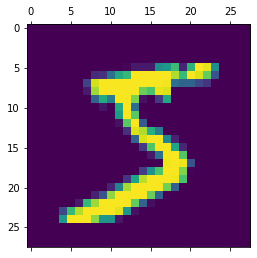

In [13]:
# Handling highly imbalanced data
    # Method: oversampling minority class using SMOTE (Synthetic Minority Oversampling Technique)
        # smote = SMOTE(sampling_strategy='minority')
        # x_sm, y_sm = smote.fit_resample(x, y)
        # from sklearn.model_selection import train_test_split
        # x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# import data
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

# normalize data for better accuracy of neural network
x_train = x_train / 255
x_test = x_test / 255

# visualize data
plt.matshow(x_train[0])
y_train[0]

# Sequential API

In [42]:
# make a neural network 
# flatten input into 1D array
# 28X28 node layer flattened and passed on to a 100 node layer ending at a 10 node layer (having digits 0 to 9 as probabilities) 
# Dropout regularization helps stop overfitting of model by dropping neurons randomly 
# compile, fit and evaluate

model_sequential = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='sigmoid')
])

model_sequential.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model_sequential.fit(x_train, y_train, epochs=1, callbacks=[tb_callback])

model_sequential.evaluate(x_test, y_test)

313/313 [==============================] - 0s 970us/step - loss: 0.1487 - accuracy: 0.9568


[0.14873278141021729, 0.9567999839782715]

# Functional API

In [43]:

inputs = keras.layers.Input(shape=(28,28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="sigmoid")(x)

model_functional = keras.Model(inputs=inputs, outputs=outputs)

model_functional.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model_functional.fit(x_train, y_train, epochs=1, callbacks=[tb_callback])

model_functional.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9670


[0.10774016380310059, 0.9670000076293945]

In [63]:
# Load tensorboard

# %load_ext tensorboard
# %tensorboard --logdir logs/fit

7

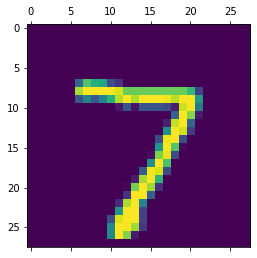

In [46]:
# store predictions
# digits 0 to 9 are as probabilities, argmax is used to give index of max probability of an array
y_predict = model_functional.predict(x_test)

y_predict_labels = [np.argmax(i) for i in y_predict]

plt.matshow(x_test[0])
y_predict_labels[0]

In [47]:
# confusuion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    2,    3,    2,    1,    3,    2],
       [   0, 1118,    3,    1,    0,    1,    5,    1,    6,    0],
       [   6,    0,  986,    8,    7,    1,    2,    8,   13,    1],
       [   0,    0,    6,  978,    0,    4,    0,    5,    7,   10],
       [   0,    0,    2,    0,  974,    0,    2,    0,    0,    4],
       [   3,    0,    0,    8,    3,  858,    7,    1,    5,    7],
       [   6,    3,    1,    1,    9,    7,  929,    0,    2,    0],
       [   1,    4,   10,    1,    5,    0,    0,  975,    3,   29],
       [   4,    0,    1,    6,   10,    5,    6,    5,  930,    7],
       [   3,    4,    0,    6,   28,    4,    0,    3,    5,  956]])>

In [49]:
# f1 score

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_predict_labels))

# Layers of the model
model_functional.summary()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.94      0.99      0.96       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28)]          0         
__________________________